In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display,clear_output
from PIL import Image as Im
import time

In [3]:
%%writefile game_of_life_utils.py

import numpy as np
from scipy.signal import convolve2d

def life_step_1(X):
    """Game of life step using generator expressions"""
    nbrs_count = sum(np.roll(np.roll(X, i, 0), j, 1)
                     for i in (-1, 0, 1) for j in (-1, 0, 1)
                     if (i != 0 or j != 0))
    return (nbrs_count == 3) | (X & (nbrs_count == 2))

def life_step_2(X):
    """Game of life step using scipy tools"""
    nbrs_count = convolve2d(X, np.ones((3, 3)), mode='same', boundary='wrap') - X
    return (nbrs_count == 3) | (X & (nbrs_count == 2))

def set_ic(X,ic,offset=(0,0)):
    Ni,Nj = X.shape
    ni,nj = np.array(ic).shape
    assert(offset[0]+ni<Ni)
    assert(offset[1]+nj<Nj)
    X[offset[0]:offset[0]+ni, offset[1]:offset[1]+nj] = ic     
    

unbounded = [[1, 1, 1, 0, 1],
             [1, 0, 0, 0, 0],
             [0, 0, 0, 1, 1],
             [0, 1, 1, 0, 1],
             [1, 0, 1, 0, 1]]

diehard = [[0, 0, 0, 0, 0, 0, 1, 0],
           [1, 1, 0, 0, 0, 0, 0, 0],
           [0, 1, 0, 0, 0, 1, 1, 1]]

boat = [[1, 1, 0],
        [1, 0, 1],
        [0, 1, 0]]

r_pentomino = [[0, 1, 1],
               [1, 1, 0],
               [0, 1, 0]]

beacon = [[0, 0, 1, 1],
          [0, 0, 1, 1],
          [1, 1, 0, 0],
          [1, 1, 0, 0]]

acorn = [[0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [1, 1, 0, 0, 1, 1, 1]]

spaceship = [[0, 0, 1, 1, 0],
             [1, 1, 0, 1, 1],
             [1, 1, 1, 1, 0],
             [0, 1, 1, 0, 0]]

block_switch_engine = [[0, 0, 0, 0, 0, 0, 1, 0],
                       [0, 0, 0, 0, 1, 0, 1, 1],
                       [0, 0, 0, 0, 1, 0, 1, 0],
                       [0, 0, 0, 0, 1, 0, 0, 0],
                       [0, 0, 1, 0, 0, 0, 0, 0],
                       [1, 0, 1, 0, 0, 0, 0, 0]]
glider_gun =\
[[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
 [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
 [1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]

all_ics = [diehard,boat,r_pentomino,beacon,acorn,spaceship,block_switch_engine,glider_gun,unbounded]


Overwriting game_of_life_utils.py


In [19]:
from game_of_life_utils import *

Ni,Nj = 60,40
X = np.zeros((Ni,Nj),dtype=np.bool)
set_ic(X,unbounded,offset = (25,28))

In [28]:
Ni,Nj = 299,299
X = np.zeros((Ni,Nj),dtype=np.bool)
r = np.random.random((Ni,Nj))
X[:,:] = (r > 0.625)

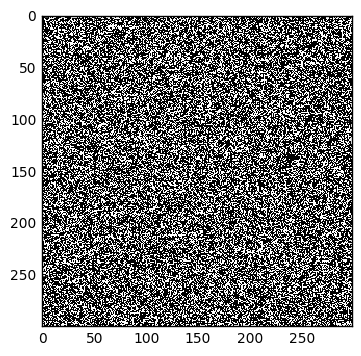

In [29]:
plt.imshow(X,interpolation='nearest',cmap='gray')

In [30]:
%%time 
Xtime=[]
for s in range(225):
    X = life_step_2(X)
    Xtime.append(X.copy())
   

CPU times: user 872 ms, sys: 12 ms, total: 884 ms
Wall time: 882 ms


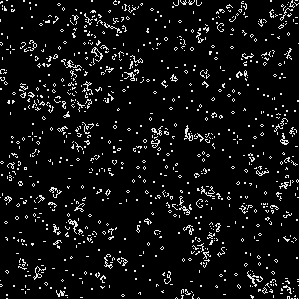

224


In [31]:
n = max(Ni,Nj)
if n<100:
    scale = 500//n
else:
    scale = 1
    
for i,X_ in enumerate(Xtime[::]):
    clear_output(wait=True)
    time.sleep(0.05)
    display(Im.fromarray(240*X_.astype(np.uint8)).resize((scale*Nj,scale*Ni)))
    print(s)
   

## Parallel game of life

1d partitioning

In [12]:
import ipyparallel as ipp
c = ipp.Client(profile='mpi')
print(c.ids)
view = c[:]
view.activate()


[0, 1, 2, 3, 4, 5]


In [13]:
import os
print(view.apply_sync(os.getcwd))
view.map(os.chdir, ['ProgramowanieRownolegle/MPI']*len(c.ids))
print(view.apply_sync(os.getcwd))

['/home/users/marcin.kostur', '/home/users/marcin.kostur', '/home/users/marcin.kostur', '/home/users/marcin.kostur', '/home/users/marcin.kostur', '/home/users/marcin.kostur']
['/home/users/marcin.kostur/ProgramowanieRownolegle/MPI', '/home/users/marcin.kostur/ProgramowanieRownolegle/MPI', '/home/users/marcin.kostur/ProgramowanieRownolegle/MPI', '/home/users/marcin.kostur/ProgramowanieRownolegle/MPI', '/home/users/marcin.kostur/ProgramowanieRownolegle/MPI', '/home/users/marcin.kostur/ProgramowanieRownolegle/MPI']


In [21]:
%%px --block


from mpi4py import MPI 
import numpy as np


from game_of_life_utils import *

#number of procesess:

comm = MPI.COMM_WORLD
No_processes = comm.Get_size()
rank = comm.Get_rank()

#constants

Ni,Nj = No_processes*10,40
Niter = 225

#area:

if rank==0:    
   
    X = np.zeros((Ni,Nj),dtype=np.bool)
    set_ic(X,unbounded,offset = (25,28))
    
else: 
    X = None

# subdomains:
buf = np.empty((Ni//No_processes,Nj),dtype=np.bool)
X_local = np.empty((Ni//No_processes+2,Nj),dtype=np.bool)

comm.Scatter(X, buf )
X_local[1:-1,:] = buf

U_local_time = []
Xtime = []
   
L_bulk  = (1,slice(None))
L_ghost = (0,slice(None))
R_bulk  = (-2, slice(None))
R_ghost = (-1, slice(None))

for i in range(Niter):
    
    if rank<(No_processes-1):
        comm.Send(X_local[R_bulk], dest=rank+1)
        comm.Recv(X_local[R_ghost],source=rank+1)
        
    if rank>0:
        comm.Recv(X_local[L_ghost],source=rank-1)
        comm.Send(X_local[L_bulk], dest=rank-1)
    
    X_local = life_step_2(X_local)

    comm.Gather(X_local[1:-1],X )
    if rank==0:
        Xtime.append( X.copy() )

    U_local_time.append( X_local[1:-1].copy() )


```python

if rank%2 == 0:
    comm.Send(X_local[R_bulk], dest=(rank+1)%No_processes)
    comm.Recv(X_local[R_ghost],source=(rank+1)%No_processes)

if rank%2 == 1:
    comm.Recv(X_local[L_ghost],source=(rank-1)%No_processes)
    comm.Send(X_local[L_bulk], dest=(rank-1)%No_processes)

if rank%2 == 1:
    comm.Send(X_local[R_bulk], dest=(rank+1)%No_processes)
    comm.Recv(X_local[R_ghost],source=(rank+1)%No_processes)

if rank%2 == 0:
    comm.Recv(X_local[L_ghost],source=(rank-1)%No_processes)
    comm.Send(X_local[L_bulk], dest=(rank-1)%No_processes)
```

In [19]:
%%px --block


from mpi4py import MPI 
import numpy as np


from game_of_life_utils import *

#number of procesess:

comm = MPI.COMM_WORLD
No_processes = comm.Get_size()
rank = comm.Get_rank()

#constants

Ni,Nj = No_processes*10,40
Niter = 225

#area:

if rank==0:    
   
    X = np.zeros((Ni,Nj),dtype=np.bool)
    set_ic(X,unbounded,offset = (25,28))
    
else: 
    X = None

# subdomains:
buf = np.empty((Ni//No_processes,Nj),dtype=np.bool)
X_local = np.empty((Ni//No_processes+2,Nj),dtype=np.bool)

comm.Scatter(X, buf )
X_local[1:-1,:] = buf

U_local_time = []
Xtime = []
   
L_bulk  = (1,slice(None))
L_ghost = (0,slice(None))
R_bulk  = (-2, slice(None))
R_ghost = (-1, slice(None))

for i in range(Niter):
    
    if rank%2 == 0:
        comm.Send(X_local[R_bulk], dest=(rank+1)%No_processes)
        comm.Recv(X_local[R_ghost],source=(rank+1)%No_processes)
        comm.Recv(X_local[L_ghost],source=(rank-1)%No_processes)
        comm.Send(X_local[L_bulk], dest=(rank-1)%No_processes)
        
    if rank%2 == 1:
        comm.Recv(X_local[L_ghost],source=(rank-1)%No_processes)
        comm.Send(X_local[L_bulk], dest=(rank-1)%No_processes)
        comm.Send(X_local[R_bulk], dest=(rank+1)%No_processes)
        comm.Recv(X_local[R_ghost],source=(rank+1)%No_processes)

   
    X_local = life_step_2(X_local)

    comm.Gather(X_local[1:-1],X )
    if rank==0:
        Xtime.append( X.copy() )

    U_local_time.append( X_local[1:-1].copy() )


In [17]:
%%px --block


from mpi4py import MPI 
import numpy as np


from game_of_life_utils import *

#number of procesess:

comm = MPI.COMM_WORLD
No_processes = comm.Get_size()
rank = comm.Get_rank()

#constants

Ni,Nj = No_processes*10,40
Niter = 225

#area:

if rank==0:    
   
    X = np.zeros((Ni,Nj),dtype=np.bool)
    set_ic(X,unbounded,offset = (25,28))
    
else: 
    X = None

# subdomains:
buf = np.empty((Ni//No_processes,Nj),dtype=np.bool)
X_local = np.empty((Ni//No_processes+2,Nj),dtype=np.bool)

comm.Scatter(X, buf )
X_local[1:-1,:] = buf

U_local_time = []
Xtime = []
   
L_bulk  = (1,slice(None))
L_ghost = (0,slice(None))
R_bulk  = (-2, slice(None))
R_ghost = (-1, slice(None))

for i in range(Niter):
    
    if rank%2 == 0:
        comm.Sendrecv(X_local[R_bulk], dest=(rank+1)%No_processes,sendtag=0,\
                      recvbuf=X_local[R_ghost],source=(rank+1)%No_processes)
        comm.Sendrecv(X_local[L_bulk], dest=(rank-1)%No_processes,sendtag=0, \
                      recvbuf=X_local[L_ghost],source=(rank-1)%No_processes)
       
        
    if rank%2 == 1:
        comm.Sendrecv(X_local[L_bulk], dest=(rank-1)%No_processes,sendtag=0,\
                      recvbuf=X_local[L_ghost],source=(rank-1)%No_processes)
        comm.Sendrecv(X_local[R_bulk], dest=(rank+1)%No_processes,sendtag=0,\
                      recvbuf=X_local[R_ghost],source=(rank+1)%No_processes)
      

   
    X_local = life_step_2(X_local)

    comm.Gather(X_local[1:-1],X )
    if rank==0:
        Xtime.append( X.copy() )

    U_local_time.append( X_local[1:-1].copy() )


In [15]:
np.argsort(view['rank'])[0]

0

In [16]:
len( view['Xtime'][ np.argsort(view['rank'])[0] ] ) 

225

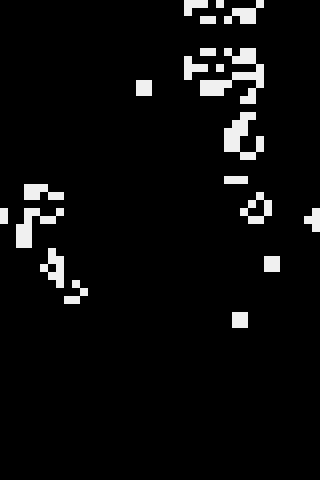

224


In [22]:
Xtime_parallel =  view['Xtime'][ np.argsort(view['rank'])[0] ] 
Ni, Nj = Xtime_parallel[0].shape
n = max(Ni,Nj)
if n<100:
    scale = 500//n
else:
    scale = 1
    
for i,X_ in enumerate(Xtime_parallel[::]):
    clear_output(wait=True)
    time.sleep(0.02)
    display(Im.fromarray(240*X_.astype(np.uint8)).resize((scale*Nj,scale*Ni)))
    print(i)
   

In [23]:
for X_,Xp_ in zip(Xtime,Xtime_parallel):
    print (np.all(X_ == Xp_))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fal